In [ ]:
import numpy as np
!pip install keras
from tensorflow import keras

import time
import pandas as pd

# Instead of keras.utils import np_utils, use tensorflow.keras.utils
from keras.utils import to_categorical
#from keras.utils import np_utils
from keras.models import Sequential

from keras.optimizers import SGD
# np_utils has been removed, use to_categorical directly from tensorflow.keras.utils
#from keras.utils import np_utils

from keras.layers import Input, Dense, Flatten, Dropout, Concatenate, Activation
#from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping
np.random.seed(7)

In [ ]:
data=pd.read_csv('data.csv',delimiter=';',usecols=[1],engine='python')
data.head(10)

,Passengers
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


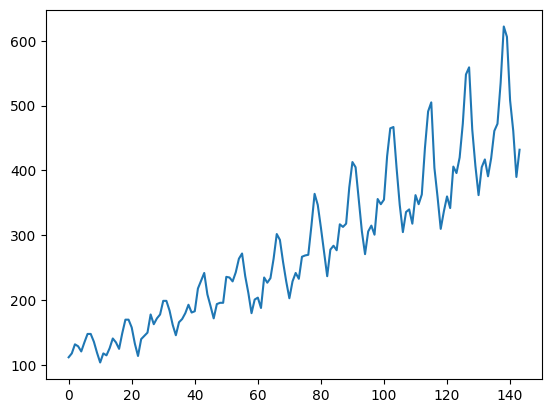

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt

plt.plot(data)

plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)


In [ ]:
np.shape(data)

(144, 1)

In [ ]:
data_revalled=data.reshape(len(data),)
np.shape(data_revalled)

(144,)

In [ ]:
data_ravelled=data.ravel()

In [ ]:
def sliding_window(a, window):
  shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
  strides = a.strides + (a.strides[-1],)
  return np.lib.stride_tricks.as_strided(a,shape=shape,strides=strides)

In [ ]:
size = 3
win_data = sliding_window(data_ravelled, size)
np.shape(win_data)

(142, 3)

In [ ]:
train_size=int(len(win_data)*0.7)
test_size=len(win_data)-train_size
train,test=win_data[0:train_size,:],win_data[train_size:len(win_data),:]
test,validation=test[0:int(test_size/2),:],test[int(test_size/2):len(test),:]

In [ ]:
def create_dataset(dataset,look_back):
    dataX,dataY=[],[]
    for i in range(dataset.shape[0]-look_back-1):
        a=dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)


In [ ]:
look_back=3
X_train,y_train=create_dataset(train,look_back)
X_test,testY=create_dataset(test,look_back)
X_validation,y_validation=create_dataset(validation,look_back)


In [ ]:
print(np.shape(X_train))
np.shape(y_train)

(95, 3)


(95,)

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_validation=np.reshape(X_validation,(X_validation.shape[0],X_validation.shape[1],1))

In [ ]:
print(np.shape(y_validation))
np.shape(X_validation)

(18,)


(18, 3, 1)

In [ ]:
y_train=np.reshape(y_train,(y_train.shape[0],1))
y_test=np.reshape(testY,(testY.shape[0],1))
y_validation=np.reshape(y_validation,(y_validation.shape[0],1))

In [ ]:
print(X_validation.shape)
print(y_validation.shape)


(18, 3, 1)
(18, 1)


In [ ]:
batch_size=32
sequence_length=X_train.shape[1]
input_dim=X_train.shape[2]
output_dim=1
num_epoch=100
model = Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(sequence_length, input_dim)))
model.add(Dropout(0.2))


model.add(LSTM(128,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim))
model.add(Activation("linear"))

checkpointer = ModelCheckpoint(filepath='LSTM.keras', monitor='val_loss', verbose=0,
                              save_best_only=False, save_weights_only=False, mode='min', save_freq=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='auto')

model.compile(loss='mean_squared_error', metrics=['mse'])

print(model.summary())



Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                       │ (None, 3, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_39 (LSTM)                       │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115,841 (452.50 KB)

 Trainable params: 115,841 (452.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=num_epoch,
    batch_size=batch_size,
    validation_data=(X_validation, y_validation),
    callbacks=[checkpointer,early_stopping]
)


Epoch 1/100


Exception ignored in: <function _xla_gc_callback at 0x79e7e13481f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


3/3 ━━━━━━━━━━━━━━━━━━━━ 48s 266ms/step - accuracy: 0.0092 - loss: 0.0651 - val_accuracy: 0.0000e+00 - val_loss: 0.3805
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0170 - loss: 0.0317 - val_accuracy: 0.0000e+00 - val_loss: 0.2887
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0092 - loss: 0.0204 - val_accuracy: 0.0000e+00 - val_loss: 0.2237
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0170 - loss: 0.0147 - val_accuracy: 0.0000e+00 - val_loss: 0.1841
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.0053 - loss: 0.0123 - val_accuracy: 0.0000e+00 - val_loss: 0.1633
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0092 - loss: 0.0127 - val_accuracy: 0.0000e+00 - val_loss: 0.1517
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0092 - loss: 0.0122 - val_accuracy: 0.0000e+00 - val_loss: 0.1379
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0053 - loss: 0.0113 - val_accuracy: 